In [510]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [511]:
PROGRAM = 'windup'
RFR = 500
I = 3

In [512]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI_ORIGINAL = '#ebb300'
COLOR_OCKER_ANDI = '#EC7F00'
COLOR_OCKER = '#EA5C21'

COLOR_NONE = '#8E8E8D'
COLOR_NONE_DARK = '#4E4E4D'

PROGRAM_COLORS = {'getpixel':COLOR_OCKER_ANDI, 'bitblt':COLOR_OCKER, 'getdbits':COLOR_GLUTROT,'windup':COLOR_HEIDENELKE}

In [513]:
PATH = f'./data/final_{RFR}'
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [514]:
program_data_files = []
app_data_files = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    data_in['program'] = file.split('_')[1]
    #print(file.split('_')[2])
    if 'program' in file:
        program_data_files.append(data_in)
    else:
        app_data_files.append(data_in)
    

In [515]:
# data_measurements[(data_measurements['color'] >= 100) & (data_measurements['color'] <= 110)]['time_since_start'].diff().mean()

exemplarily, we observe the color values 100 to 150 (otherwise, it would be too much for one plot)

In [516]:
refactored_program = []
refactored_app = []
for i, current_program in enumerate(program_data_files):
    current_app = app_data_files[i]
    start = current_app[(current_app['event_type'] == 'render_stop') & (current_app['color'] == 100)]['timestamp'].min()
    # start = current_app[current_app['event_type'] == 'start']['timestamp'].min()
    current_program['time_since_start'] = current_program['timestamp'] - start
    current_app['time_since_start'] = current_app['timestamp'] - start
    refactored_program.append(current_program)
    refactored_app.append(current_app)

In [517]:
data_program = pd.concat(refactored_program)
data_app = pd.concat(refactored_app)

In [518]:
data_events = data_app[data_app['program'] == PROGRAM]
data_measurements = data_program[data_program['program'] == PROGRAM]

data_events['timestamp'] = data_events['timestamp'] / 1000 
data_measurements['timestamp'] = data_measurements['timestamp'] / 1000 
data_events['time_since_start'] = data_events['time_since_start'] / 1000 
data_measurements['time_since_start'] = data_measurements['time_since_start'] / 1000 

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_13460\730176844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_events['timestamp'] = data_events['timestamp'] / 1000
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_13460\730176844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_measurements['timestamp'] = data_measurements['timestamp'] / 1000
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_13460\730176844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [519]:
data_measurements[data_measurements['iteration'] == I]

,event_type,timestamp,color,iteration,program,time_since_start
0,got color at,1.719426e+12,0,3,windup,-4780.61775
1,got color at,1.719426e+12,4,3,windup,-4779.50575
2,got color at,1.719426e+12,5,3,windup,-4744.81475
3,got color at,1.719426e+12,6,3,windup,-4694.91475
4,got color at,1.719426e+12,7,3,windup,-4644.76775
...,...,...,...,...,...,...
13965,got color at,1.719426e+12,-3,3,windup,7854.05925
13966,got color at,1.719426e+12,-3,3,windup,7854.06725
13967,got color at,1.719426e+12,-3,3,windup,7854.07525
13968,got color at,1.719426e+12,-3,3,windup,7854.08425


In [520]:
# data_single_measurements = data_measurements[data_measurements['iteration'] == I]
# data_single_events = data_events[data_events['iteration'] == I]

# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 5), "xtick.bottom": True, "grid.linestyle": ":"})
# plot = sns.lineplot(data_single_measurements[(data_single_measurements['color'] > 0) & (data_single_measurements['color'] < 256)], x='time_since_start', y='color', marker='o')

# for value in data_single_events[data_single_events['event_type'] == 'render_stop']['time_since_start']:
#     plot.axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

# for value in data_single_events[data_single_events['event_type'] == 'render_start']['time_since_start']:
#     plot.axvline(value, color=COLOR_BLUE, linewidth=0.5)


# plot.set_xlabel('time since application start (ms)')
# # plot.set_xlim(0, 50)

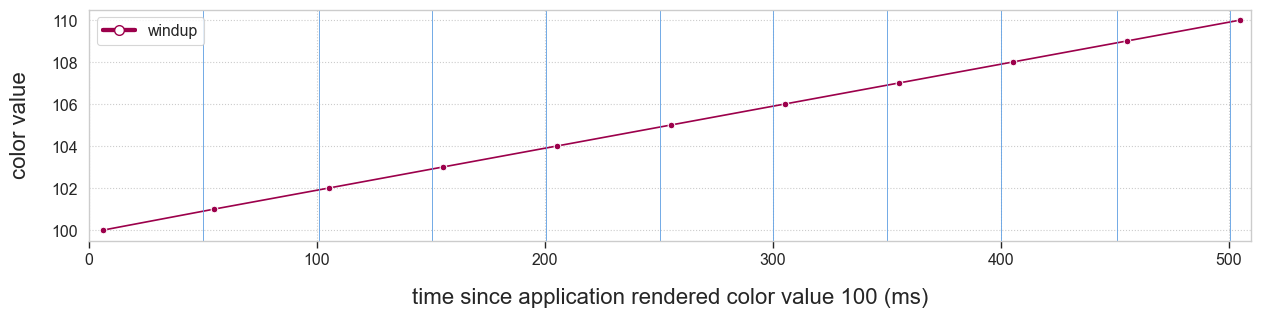

In [521]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 3), "xtick.bottom": True, "grid.linestyle": ":"})

data_single_measurements = data_measurements[data_measurements['iteration'] == I]
data_single_events = data_events[data_events['iteration'] == I]

plot = sns.lineplot(data_single_measurements[(data_single_measurements['color'] >= 100) & (data_single_measurements['color'] <= 110)], x='time_since_start', y='color', marker='o', color=PROGRAM_COLORS[PROGRAM])

for value in data_single_events[data_single_events['event_type'] == 'render_start']['time_since_start']:
    plot.axvline(value, color=COLOR_NONE, linewidth=0.5)

for value in data_single_events[data_single_events['event_type'] == 'render_stop']['time_since_start']:
    plot.axvline(value, color=COLOR_BLUE, linewidth=0.5)


handles = []
handles.append((
    mpl.lines.Line2D([0, 1, 2, 3, 4], [1, 1, 1, 1], color=PROGRAM_COLORS[PROGRAM], markerfacecolor=PROGRAM_COLORS[PROGRAM], linewidth=3),
    mpl.lines.Line2D([2], [2], marker='o', mfc='white', color=PROGRAM_COLORS[PROGRAM], markersize=7, linewidth=3)
))

legend = plot.legend(loc='upper left', handles=handles, labels=[PROGRAM])
legend.set_visible(True)


plot.set_ylabel('color value', labelpad=15, fontsize=16)
plot.set_xlabel('')
plot.set_xlabel('time since application rendered color value 100 (ms)', labelpad=15, fontsize=16)
plot.set_xlim(0, 510)

plt.savefig(f"../analysis/figures/{PROGRAM}_{RFR}_validation_final.pdf", format='pdf', bbox_inches='tight')


In [522]:
data_measurements[(data_measurements['color'] >= 5) & (data_measurements['color'] <= 254)]['time_since_start'].diff().median()

49.998999999999796

In [523]:
# for i in range(255):
#     data_single_measurements = data_measurements[data_measurements['iteration'] == i]
#     print(i, data_single_measurements['time_since_start'].diff().mean())

In [524]:
# diff_dict = {}
# for iteration in range(50):
#     for program in data_app['program'].unique():
#         diff_dict[program] = []
#         data_temp_program = data_program[(data_program['program'] == program) & (data_program['iteration'] == i)]
#         data_temp_app = data_app[(data_app['program'] == program) & (data_app['iteration'] == i)]
#         for color in range(5, 255):
#             first_measurement_for_color = data_temp_program[data_temp_program['color'] == color]['time_since_start'].min()
#             # print(program, color, len(first_measurement_for_color))
#             # first_measurement_for_color = first_measurement_for_color.min()
#             render_stop_for_color = data_temp_app[(data_temp_app['color'] == color) & (data_temp_app['event_type'] == 'render_stop')]['time_since_start'].min()
#             if math.isnan(render_stop_for_color) or math.isnan(first_measurement_for_color):
#                 print(f'no value for {color}')
#             else:
#                 diff_dict[program].append(first_measurement_for_color - render_stop_for_color.min())

In [525]:
# data_diffs = pd.DataFrame.from_dict(diff_dict)
# data_melted = data_diffs.melt(var_name='program', value_name='diff')
# data_melted
# data_melted['diff'] = data_melted['diff'] / 1000 

In [526]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(7, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# plot = sns.boxplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], color=COLOR_NONE, fill=False, linewidth=1.5)
# plot = sns.stripplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], palette=[COLOR_OCKER_ANDI, COLOR_OCKER, COLOR_GLUTROT, COLOR_HEIDENELKE], size=2)

# plot.set_ylim(0, 7)
# plot.set_ylabel('time passed since render (ms)', labelpad=18, fontsize=16)
# plot.set_xlabel('')
# # plt.savefig("../analysis/figures/validation_dist_{RFR}.pdf", format='pdf', bbox_inches='tight')

In [527]:
# data_melted[data_melted['program'] == 'windup']['diff'].mean()